In [4]:
folder_path = "/kaggle/input/x-ray-dataset"
json_file = "/kaggle/input/json-files/images_json.json"
corrupted_dir = '/kaggle/working/corrupted_images'

In [5]:
os.makedirs(corrupted_dir, exist_ok=True)

for f in os.listdir(folder_path):
    fp = os.path.join(folder_path, f)
    try:
        img = Image.open(fp)
        img.verify()
    except (IOError, SyntaxError) as e:
        print(f"Corrupted: {f}. error: {e}")
        shutil.copy(fp, os.path.join(corrupted_dir, f))

Corrupted: 2022_10_12_4ACE32DB_A95FA0CE_007E2E57.jpeg. error: cannot identify image file '/kaggle/input/x-ray-dataset/2022_10_12_4ACE32DB_A95FA0CE_007E2E57.jpeg'
Corrupted: 2022_10_12_E8438BC0_50956DDF_4AE65D2F.jpeg. error: cannot identify image file '/kaggle/input/x-ray-dataset/2022_10_12_E8438BC0_50956DDF_4AE65D2F.jpeg'
Corrupted: 2022_10_12_9D39D994_1B119596_C47CA026.jpeg. error: cannot identify image file '/kaggle/input/x-ray-dataset/2022_10_12_9D39D994_1B119596_C47CA026.jpeg'
Corrupted: 2022_10_12_44301E05_2C6F50C8_B868AB13.jpeg. error: cannot identify image file '/kaggle/input/x-ray-dataset/2022_10_12_44301E05_2C6F50C8_B868AB13.jpeg'
Corrupted: 2022_10_12_FC4E4E1B_42D57034_F1E64E45.jpeg. error: cannot identify image file '/kaggle/input/x-ray-dataset/2022_10_12_FC4E4E1B_42D57034_F1E64E45.jpeg'
Corrupted: 2022_10_12_DF27769E_473940C2_059B77DC.jpeg. error: cannot identify image file '/kaggle/input/x-ray-dataset/2022_10_12_DF27769E_473940C2_059B77DC.jpeg'
Corrupted: 2022_10_12_893C92

In [3]:
import os

import random

import torch

import torchvision

from PIL import Image

from torch.utils.data import Dataset, DataLoader, random_split

from torchvision.models.detection import fasterrcnn_resnet50_fpn

from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

from torchvision import transforms

import numpy as np
import shutil

In [6]:
corrupted_images = list(set(os.listdir(corrupted_dir)))
available_images= list(set(os.listdir(folder_path)) )
print(len(available_images))
available_images = [x for x in available_images if x not in corrupted_images ]
print(len(available_images))

3299
3254


In [7]:
import random

import json

with open(json_file, 'r') as f:

    data = json.load(f)



# Separate images by class

for item in data:

  if item['label'] == 'no abnormality':

    item['label'] ='D'



class_a = [item for item in data if item['label'] == 'A']

class_b = [item for item in data if item['label'] == 'B']

class_c = [item for item in data if item['label'] == 'C']

class_d = [item for item in data if item['label'] == 'D']

In [8]:
print(f"Class A: {len(class_a)}")

print(f"Class B: {len(class_b)}")

print(f"Class C: {len(class_c)}")

print(f"Class D: {len(class_d)}")

Class A: 600
Class B: 600
Class C: 600
Class D: 1500


In [9]:
# 1. Set random seed for reproducibility

random.seed(42)



# 2. Filter samples based on availability

sample_a = [img for img in random.sample(class_a, min(600, len(class_a))) if img['image_path'] in available_images]

sample_b = [img for img in random.sample(class_b, min(600, len(class_b))) if img['image_path'] in available_images]

sample_c = [img for img in random.sample(class_c, min(600, len(class_c))) if img['image_path'] in available_images]

sample_d = [img for img in random.sample(class_d, min(600, len(class_d))) if img['image_path'] in available_images]



# 3. Combine samples into a final list

combined_samples = sample_a + sample_b + sample_c + sample_d

print(f"Selected {len(combined_samples)} images for the dataset.")



# 4. Create annotations dictionary

combined_annotations = {

    item['image_path']: {

        'label': item['label'],

        'b_box': item['b_box'],

        'area': item['area'],

        'iscrowd': item['iscrowd']

    }

    for item in combined_samples

}


Selected 2379 images for the dataset.


In [10]:
print(f"Class A: {len(sample_a)}")

print(f"Class B: {len(sample_b)}")

print(f"Class C: {len(sample_c)}")

print(f"Class D: {len(sample_d)}")

Class A: 600
Class B: 600
Class C: 600
Class D: 579


//kaggle/input/x-ray-dataset/2022_03_31_52091F3C_087DB643_D7819288.jpeg
[{'label': 'A', 'b_box': [[0.31757312450833153, 0.5379746835443038, 0.0479600228849317, 0.049050632911392424], [0.2540584996066652, 0.47310126582278483, 0.028516770364013445, 0.037974683544303715], [0.32121159615438755, 0.6840675858871011, 0.027201302711132483, 0.02454234478494669], [0.2668089907321226, 0.7143846000332119, 0.027201302711132556, 0.037535350847565783]], 'area': 0.005123978997739275, 'iscrowd': True}]
[{'label': 'A', 'b_box': [[0.31757312450833153, 0.5379746835443038, 0.0479600228849317, 0.049050632911392424], [0.2540584996066652, 0.47310126582278483, 0.028516770364013445, 0.037974683544303715], [0.32121159615438755, 0.6840675858871011, 0.027201302711132483, 0.02454234478494669], [0.2668089907321226, 0.7143846000332119, 0.027201302711132556, 0.037535350847565783]], 'area': 0.005123978997739275, 'iscrowd': True}]
[0.31757312450833153, 0.5379746835443038, 0.0479600228849317, 0.049050632911392424]
ORG: 1

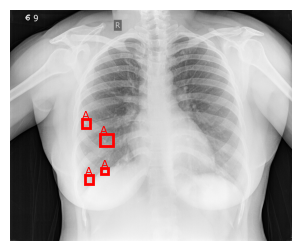

In [11]:
import matplotlib.pyplot as plt

import matplotlib.patches as patches

from PIL import Image



# Function to visualize images with bounding boxes

def visualize_bounding_boxes(image_path, annotations):

    # Load the image

    image = Image.open(image_path)

    image = image.convert("RGB")

    img_width, img_height = image.size



    fig, ax = plt.subplots(1, figsize=(5, 3))

    ax.imshow(image)



    # Plot bounding boxes

    print(annotations)

    for annotation in annotations:

        for bbox in annotation['b_box']:

          box = bbox

          print(box)

          x_min = box[0] * img_width

          y_min = box[1] * img_height

          width = box[2] * img_width

          height = box[3] * img_height

          print("ORG:", x_min, y_min, width, height)

          rect = patches.Rectangle(

          (x_min, y_min),

          width,

          height,

          linewidth=2,

          edgecolor='red',

          facecolor='none'

        )



          ax.add_patch(rect)



          # Optionally, add the label

          label = annotation['label']

          ax.text(x_min, y_min - 5, label, color='red', fontsize=8, backgroundcolor='none')



    plt.axis('off')  # Turn off axis

    plt.show()



# Visualize images and their bounding boxes

for sample in combined_samples:

    i = sample['image_path']

    image_path = f"//kaggle/input/x-ray-dataset/{sample['image_path']}"

    print(image_path)

    # Get annotations for the current image

    annotations = [combined_annotations[i]] if i in combined_annotations else []

    print(annotations)

    # Call the visualization function

    visualize_bounding_boxes(image_path, annotations)

    break


In [12]:
# 5. Custom Dataset class

class XRayDataset(Dataset):

    def __init__(self, image_dir, annotations, transform=None):

        self.image_dir = image_dir

        self.annotations = annotations

        self.transform = transform

        self.image_names = list(annotations.keys())



    def __len__(self):

        return len(self.image_names)



    def __getitem__(self, idx):

        image_name = self.image_names[idx]

        img_path = os.path.join(self.image_dir, image_name)

        image = Image.open(img_path).convert("RGB")



        annotation = self.annotations[image_name]

        label = annotation['label']

        bboxes = annotation['b_box']



        boxes = []

        labels = []



        # Convert bounding boxes from YOLO to [x_min, y_min, x_max, y_max]

        label_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3}

        for bbox in bboxes:

            x_center, y_center, width, height = bbox

            x_min = x_center - width / 2

            y_min = y_center - height / 2

            x_max = x_center + width / 2

            y_max = y_center + height / 2



            boxes.append([x_min, y_min, x_max, y_max])

            labels.append(label_mapping[label])



        # Convert to tensor

        boxes = torch.tensor(boxes, dtype=torch.float32)

        labels = torch.tensor(labels, dtype=torch.int64)



        if self.transform:

            image = self.transform(image)



        target = {

            'boxes': boxes,

            'labels': labels,

            'image_id': torch.tensor([idx]),

            'area': torch.tensor(annotation['area'], dtype=torch.float32),

            'iscrowd': torch.tensor(annotation['iscrowd'], dtype=torch.int64)

        }



        return image, target


In [13]:
# 6. Split dataset into training, validation, and test sets (70%, 15%, 15%)

train_size = int(0.8 * len(combined_samples))

test_size = len(combined_samples) - train_size



train_samples, test_samples = random_split(combined_samples, [train_size, test_size])



# Create corresponding annotation dictionaries

train_annotations = {item['image_path']: combined_annotations[item['image_path']] for item in train_samples}

# val_annotations = {item['image_path']: combined_annotations[item['image_path']] for item in val_samples}

test_annotations = {item['image_path']: combined_annotations[item['image_path']] for item in test_samples}


In [14]:
len(train_annotations)

1903

In [15]:
# 7. Define transforms for train, validation, and test sets

def get_transform(train):

    transforms_list = []

    if train:

        transforms_list.append(transforms.RandomHorizontalFlip(0.5))  # 50% horizontal flip for augmentation

    transforms_list.append(transforms.ToTensor())  # Convert image to Tensor

    transforms_list.append(transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]))  # Normalization

    return transforms.Compose(transforms_list)



# 8. Create dataset instances

image_dir = '/kaggle/input/x-ray-dataset'



train_dataset = XRayDataset(image_dir, train_annotations, transform=get_transform(train=True))

# val_dataset = XRayDataset(image_dir, val_annotations, transform=get_transform(train=False))

test_dataset = XRayDataset(image_dir, test_annotations, transform=get_transform(train=False))


In [16]:
1903 + 476

2379

In [17]:
test_dataset[0]

(tensor([[[-1.2617, -1.1589, -1.0733,  ..., -1.1589, -1.2617, -1.2959],
          [-1.3987, -1.3473, -1.2959,  ..., -1.1760, -1.1760, -1.1760],
          [-1.2788, -1.3130, -1.3130,  ..., -1.2959, -1.2788, -1.2788],
          ...,
          [-0.1314, -0.0972, -0.0801,  ..., -0.4911, -0.4911, -0.4911],
          [-0.1657, -0.1486, -0.1314,  ..., -0.4739, -0.4739, -0.4739],
          [-0.1486, -0.1486, -0.1486,  ..., -0.4397, -0.4397, -0.4397]],
 
         [[-1.1604, -1.0553, -0.9678,  ..., -1.0553, -1.1604, -1.1954],
          [-1.3004, -1.2479, -1.1954,  ..., -1.0728, -1.0728, -1.0728],
          [-1.1779, -1.2129, -1.2129,  ..., -1.1954, -1.1779, -1.1779],
          ...,
          [-0.0049,  0.0301,  0.0476,  ..., -0.3725, -0.3725, -0.3725],
          [-0.0399, -0.0224, -0.0049,  ..., -0.3550, -0.3550, -0.3550],
          [-0.0224, -0.0224, -0.0224,  ..., -0.3200, -0.3200, -0.3200]],
 
         [[-0.9330, -0.8284, -0.7413,  ..., -0.8284, -0.9330, -0.9678],
          [-1.0724, -1.0201,

In [18]:
# 9. Create DataLoader

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2, collate_fn=lambda x: tuple(zip(*x)))

# val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=2, collate_fn=lambda x: tuple(zip(*x)))

test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False, num_workers=2, collate_fn=lambda x: tuple(zip(*x)))

In [19]:
# 10. Get Faster R-CNN model with modified head

def get_faster_rcnn_model(num_classes):

    model = fasterrcnn_resnet50_fpn(pretrained=True)  # Load pre-trained Faster R-CNN

    in_features = model.roi_heads.box_predictor.cls_score.in_features

    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model



num_classes = 5  # 4 object classes + 1 background class

model = get_faster_rcnn_model(num_classes)


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 195MB/s]  


In [20]:
def train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10):

    model.train()

    for i, (images, targets) in enumerate(data_loader):

        images = list(image.to(device) for image in images)

        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]



        loss_dict = model(images, targets)

        losses = sum(loss for loss in loss_dict.values())



        optimizer.zero_grad()

        losses.backward()

        optimizer.step()



        if i % print_freq == 0:

            print(f"Epoch {epoch}, Iteration {i}, Loss: {losses.item()}")



# 12. Evaluation function

def evaluate(model, data_loader, device):

    model.eval()

    with torch.no_grad():

        for images, targets in data_loader:

            images = list(image.to(device) for image in images)

            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]



            outputs = model(images)  # Predictions

    return outputs

In [21]:
a = 10

In [22]:
def train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=50):

    model.train()

    for i, (images, targets) in enumerate(data_loader):

        images = list(image.to(device) for image in images)

        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]



        # Check if any target has no bounding boxes

        valid_indices = [j for j, target in enumerate(targets) if target['boxes'].size(0) > 0]



        # Skip if all targets in the batch have no bounding boxes

        if not valid_indices:

            continue



        # Filter images and targets based on valid indices

        images = [images[j] for j in valid_indices]

        targets = [targets[j] for j in valid_indices]



        loss_dict = model(images, targets)

        losses = sum(loss for loss in loss_dict.values())



        optimizer.zero_grad()

        losses.backward()

        optimizer.step()



        if i % print_freq == 0:

            print(f"Epoch {epoch}, Iteration {i}, Loss: {losses.item()}")

In [71]:


# 13. Setup training loop

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model.to(device)



optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)

num_epochs = 4



for epoch in range(num_epochs):

    train_one_epoch(model, optimizer, train_loader, device, epoch)

    # evaluate(model, val_loader, device)


Epoch 0, Iteration 0, Loss: 0.2597188353538513
Epoch 0, Iteration 50, Loss: 0.10742789506912231
Epoch 0, Iteration 100, Loss: 0.23579464852809906
Epoch 0, Iteration 150, Loss: 0.1871453821659088
Epoch 0, Iteration 200, Loss: 0.24462871253490448
Epoch 0, Iteration 250, Loss: 0.2089279294013977
Epoch 0, Iteration 300, Loss: 0.20468781888484955
Epoch 0, Iteration 350, Loss: 0.10022098571062088
Epoch 0, Iteration 400, Loss: 0.22544993460178375
Epoch 0, Iteration 450, Loss: 0.3177638351917267
Epoch 1, Iteration 0, Loss: 0.40838780999183655
Epoch 1, Iteration 50, Loss: 0.16400912404060364
Epoch 1, Iteration 100, Loss: 0.22133490443229675
Epoch 1, Iteration 150, Loss: 0.25213325023651123
Epoch 1, Iteration 200, Loss: 0.13123668730258942
Epoch 1, Iteration 300, Loss: 0.18267586827278137
Epoch 1, Iteration 350, Loss: 0.32001450657844543
Epoch 1, Iteration 400, Loss: 0.31677836179733276
Epoch 1, Iteration 450, Loss: 0.2453908771276474
Epoch 2, Iteration 0, Loss: 0.23624540865421295
Epoch 2, Iter

In [72]:
model_save_path = "/kaggle/working/faster_rcnn_model_monday.pth"


torch.save(model, model_save_path)

In [23]:
# Assuming `get_faster_rcnn_model` is the function to get the model architecture

model = get_faster_rcnn_model(num_classes)


# Load the model's saved weights (state_dict)

model.load_state_dict(torch.load("/kaggle/input/faster_rcnn_2/pytorch/default/1/faster_rcnn_model1.pth"))


# Set the model to evaluation mode

model.eval()


/tmp/ipykernel_30/1065400297.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/kaggle/input/faster_rcnn_2/pytorch/default/1/faster_rcnn_

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [26]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
pred = evaluate(model, test_loader, device)

In [52]:
def evaluate(model, data_loader, device):

    model.eval()

    all_outputs = []  # List to store outputs for all images

    all_targets = []  # List to store targets for comparison (optional)



    with torch.no_grad():

        for images, targets in data_loader:

            images = list(image.to(device) for image in images)

            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]



            outputs = model(images)  # Get predictions



            all_outputs.extend(outputs)  # Collect outputs for all batches

            all_targets.extend(targets)    # Optionally collect targets for comparison



    return all_outputs, all_targets # Return predictions and targets


In [27]:
pred

[{'boxes': tensor([[4.9721e-02, 0.0000e+00, 1.0399e+01, 6.2814e+00],
          [7.3378e-02, 0.0000e+00, 1.5346e+01, 1.0335e+01],
          [0.0000e+00, 1.5042e-02, 1.0464e+01, 6.3034e+00],
          [0.0000e+00, 2.4750e-02, 1.5443e+01, 1.0371e+01]], device='cuda:0'),
  'labels': tensor([2, 2, 1, 1], device='cuda:0'),
  'scores': tensor([0.3160, 0.3160, 0.1035, 0.1035], device='cuda:0')},
 {'boxes': tensor([[3.6123e-02, 3.5833e-04, 1.4981e+01, 4.4020e+00],
          [3.5510e-02, 1.2057e-03, 1.4727e+01, 1.4813e+01],
          [0.0000e+00, 6.3171e-03, 1.5013e+01, 4.4076e+00],
          [0.0000e+00, 2.1257e-02, 1.4758e+01, 1.4832e+01]], device='cuda:0'),
  'labels': tensor([2, 2, 1, 1], device='cuda:0'),
  'scores': tensor([0.3749, 0.3749, 0.1403, 0.1403], device='cuda:0')},
 {'boxes': tensor([[ 0.0557,  0.0000, 10.8345,  5.1445],
          [ 0.5241,  0.8225,  0.5762,  0.8773],
          [ 0.0000,  0.0000, 10.8159,  5.1483],
          [ 0.4284,  1.9234,  0.4738,  1.9794],
          [ 0.523

In [28]:
import matplotlib.pyplot as plt

import matplotlib.patches as patches

from PIL import Image



def visualize_predictions(image_path, boxes, labels, scores, score_threshold=0.3):
    # Open the image

    image = Image.open(image_path)

    image = image.convert("RGB")  # Ensure image is in RGB format

    img_width, img_height = image.size





    fig, ax = plt.subplots(1)

    ax.imshow(image, cmap='gray')



    # Plot each bounding box that meets the score threshold

    for i, box in enumerate(boxes):

        if scores[i] >= score_threshold:

            # Extract x_min, y_min, x_max, y_max directly

            x_min = box[0] * img_width

            y_min = box[1] * img_height

            width = box[2] * img_width

            height = box[3] * img_height



            # Create a rectangle patch for the bounding box

            rect = patches.Rectangle(

                (x_min, y_min),  # Bottom-left corner

                width,           # Width of the box

                height,          # Height of the box

                linewidth=2,

                edgecolor='r',    # Red for bounding boxes

                facecolor='none'  # No fill

            )



            # Add the rectangle to the plot

            ax.add_patch(rect)



            # Add label and score

            label = f"Label: {labels[i]}, Score: {scores[i]:.2f}"

            plt.text(x_min, y_min - 10, label, color='white', fontsize=10, bbox=dict(facecolor='red', alpha=0.5))



    # Show the image with bounding boxes

    plt.axis('off')  # Hide axes for better visualization

    plt.show()

In [29]:
from PIL import Image

transform = transforms.Compose([

    transforms.ToTensor(),

])
model.eval()

with torch.no_grad():

    test_image_paths = ['/kaggle/input/x-ray-dataset/2021_07_25_C68A54A3_14A1A8DC_4813E897.jpeg', '/kaggle/input/x-ray-dataset/2021_09_07_93425C25_B330C957_E4D19128.jpeg']  # Provide paths to test images

    for image_path in test_image_paths:

        # Load the image using PIL

        image = Image.open(image_path)

        print(image.size)
        if image.mode != 'RGB':

            image = image.convert("RGB")

        image_tensor = transform(image).unsqueeze(0)  # Add a batch dimension (B, C, H, W)

        image_tensor = image_tensor.to(device)

        # Forward pass to get predictions

        predictions = model([image_tensor.squeeze(0)])  # Remove batch dimension, pass as list of [C, H, W]

        # Extract predicted bounding boxes, labels, and scores

        predicted_boxes = predictions[0]['boxes'].cpu().numpy()  # Get bounding boxes
        predicted_labels = predictions[0]['labels'].cpu().numpy()  # Get class labels
        predicted_scores = predictions[0]['scores'].cpu().numpy()  # Get confidence scores
        print(f"Predicted Boxes: {predicted_boxes}")
        print(f"Predicted Labels: {predicted_labels}")
        print(f"Predicted Scores: {predicted_scores}")

(3391, 3070)
Predicted Boxes: [[ 0.          0.          1.8902018   5.1084642 ]
 [ 0.          0.         15.812171    6.2507677 ]
 [ 0.          0.02796122  1.9066449   5.106856  ]
 [ 0.          0.02897931 15.958109    6.250035  ]
 [ 2.323141    0.29981917  2.527376    0.5421184 ]
 [ 2.3224258   0.30144414  2.5278926   0.54383117]]
Predicted Labels: [2 2 1 1 2 1]
Predicted Scores: [0.33371955 0.32561624 0.17284788 0.16656615 0.1294679  0.07439248]
(4280, 3520)
Predicted Boxes: [[ 0.          0.         17.85334     9.643868  ]
 [ 0.          0.04879513 18.016172    9.642493  ]
 [ 0.          1.8893974   1.4180617   8.335726  ]
 [ 2.6756024   0.31228524  2.9091249   0.5893782 ]
 [ 0.          1.9601815   1.4241992   8.3043585 ]
 [ 2.6747322   0.3141673   2.9097211   0.5913661 ]]
Predicted Labels: [2 1 2 2 1 1]
Predicted Scores: [0.3298425  0.16957177 0.1622138  0.13048822 0.10747373 0.0747553 ]


[{'boxes': tensor([[5.0778e-02, 0.0000e+00, 1.3487e+01, 4.4573e+00],
        [5.8105e-02, 0.0000e+00, 1.5659e+01, 1.0182e+01],
        [1.8141e-03, 3.3213e-03, 1.3519e+01, 4.4634e+00],
        [8.6536e-03, 3.2731e-03, 1.5697e+01, 1.0202e+01]], device='cuda:0'), 'labels': tensor([2, 2, 1, 1], device='cuda:0'), 'scores': tensor([0.3837, 0.3727, 0.1390, 0.1331], device='cuda:0')}]
input: 154.9742560684681 0.0 41162.543716430664 13603.57684135437
input: 177.33631025254726 0.0 47790.38438415527 31074.62914276123


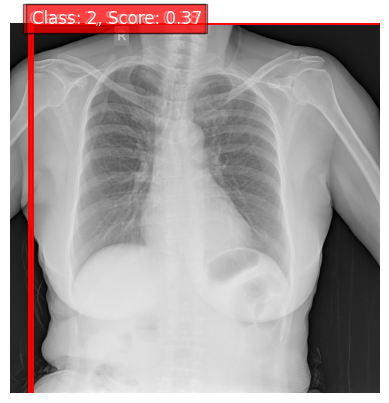

In [33]:
import matplotlib.pyplot as plt

import matplotlib.patches as patches

from PIL import Image



normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])


def plot_predictions(image, outputs, threshold=0.2):
    fig, ax = plt.subplots(1)
    ax.imshow(image, cmap='gray')
    image_width, image_height = image.size
    for box, score, label in zip(outputs['boxes'], outputs['scores'], outputs['labels']):

        if score > threshold:  # Only plot if score is above the threshold
            # Unpack the box coordinates
            x_min, y_min, width, height = box.cpu().numpy()
            x_min *= image_width
            y_min *= image_height
            width *= image_width
            height  *= image_height
            print("input:", x_min, y_min, width, height)
            # Create a Rectangle patch
            rect = patches.Rectangle((x_min, y_min), width, height,

                                     linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            ax.text(x_min, y_min, f'Class: {label.item()}, Score: {score.item():.2f}',

                    color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
    plt.axis('off')  # Hide the axis
    plt.show()





def evaluate_and_plot(model, image_paths, device, threshold=0.2):

    model.eval()
    with torch.no_grad():

        # Prepare images for the model

        images = [Image.open(path).convert("RGB") for path in image_paths]

        # Convert images to tensors and normalize

        images_tensor = [normalize(transforms.ToTensor()(image)).to(device) for image in images]
        # Get predictions

        outputs = model(images_tensor)  # Get predictions

        print(outputs)

        # Plot predictions for each image

        for image, output, path in zip(images, outputs, image_paths):

            plot_predictions(image, output, threshold)



# Example usage

image_paths = ['/kaggle/input/x-ray-dataset/2021_11_05_67FAD761_E051C610_CDECC85B.jpeg']  # Provide paths to test images

evaluate_and_plot(model, image_paths, device)


In [31]:
device

device(type='cuda')

[7.7859680e-03 2.2014214e-03 4.6270671e+00 2.9711421e+00]
width: 2412
height: 1762
org: (18.779754856601357, 3.8789045405574143) 11141.706064006314 5231.273393909913
[1.4078341e-02 2.1667639e-03 9.1748734e+00 3.3596137e+00]
width: 2412
height: 1762
org: (33.95695951581001, 3.81783795543015) 22095.837565630674 5915.821425674483


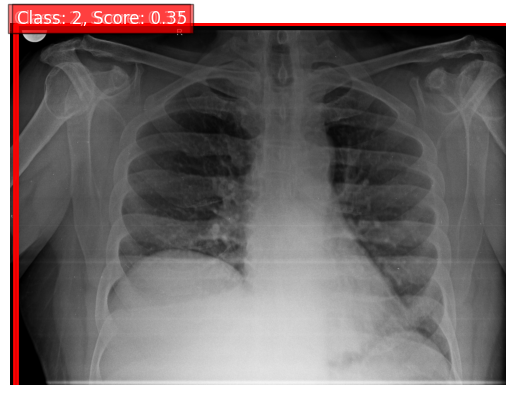

In [35]:
def evaluate_and_plot(model, image_paths, device, threshold=0.3):

    model.eval()

    with torch.no_grad():

        images = [Image.open(path).convert("RGB") for path in image_paths]



        # Get original dimensions for denormalization

        original_dimensions = [(image.width, image.height) for image in images]



        # Prepare images for the model

        images_tensor = [normalize(transforms.ToTensor()(image)).to(device) for image in images]



        # Get predictions

        outputs = model(images_tensor)



        # Plot predictions for each image

        for image, output, (width, height), path in zip(images, outputs, original_dimensions, image_paths):

            # Denormalize and plot bounding boxes

            plot_predictions(image, output, width, height, threshold)



def plot_predictions(image, outputs, image_width, image_height, threshold=0.3):

    fig, ax = plt.subplots(1)

    ax.imshow(image, cmap='gray')



    # Iterate over the predictions

    for box, score, label in zip(outputs['boxes'], outputs['scores'], outputs['labels']):

        if score > threshold:

            print(box.cpu().numpy())

            x_min, y_min, x_max, y_max = box.cpu().numpy()

            print("width:", image_width)

            print("height:", image_height)

            # Denormalize coordinates

            x_min *= image_width

            y_min *= image_height

            x_max *= image_width

            y_max *= image_height

            print("org:", (x_min, y_min), x_max - x_min, y_max - y_min)

            # Create a Rectangle patch

            rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,

                                     linewidth=2, edgecolor='r', facecolor='none')

            ax.add_patch(rect)

            ax.text(x_min, y_min, f'Class: {label.item()}, Score: {score.item():.2f}',

                    color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))



    plt.axis('off')  # Hide the axis

    plt.show()



image_paths = ['/kaggle/input/x-ray-dataset/2021_10_19_CFFA0A12_926472BC_6E7B435E.jpeg']  # Provide paths to test images



evaluate_and_plot(model, image_paths, device)
